c:\Users\ghadf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


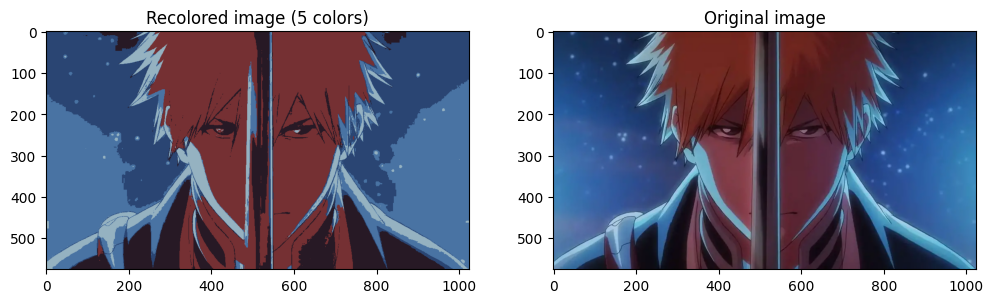

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the .webp image using PIL (Python Imaging Library)
# Use single quotes and forward slashes for the file path (raw string is not necessary in this case)
image_path = 'C:/Users/ghadf/OneDrive/Desktop/Data Analytics/Python/ML/Kmeans/pics/Bleach.webp'

image = Image.open(image_path)

# Convert the image to a numpy array for further processing
image_np = np.array(image)

# Reshape the 3D image array into a 2D array (rows = pixels, columns = channels)
reshaped_data = image_np.reshape(-1, 3)

# Normalize the pixel values to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(reshaped_data)

# Apply KMeans clustering with the desired number of clusters
num_clusters = 5  # Replace '5' with the number of clusters you want
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(normalized_data)

# Get the cluster centers, which represent the new colors
new_colors = kmeans.cluster_centers_

# Recolor the image using the new colors
recolored_data = new_colors[kmeans.predict(normalized_data)].reshape(image_np.shape)

# Convert the recolored data back to PIL Image format for display
recolored_image = Image.fromarray((recolored_data * 255).astype(np.uint8))

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Show the recolored image in the first subplot
ax[0].imshow(recolored_image)
ax[0].set_title(f'Recolored image ({num_clusters} colors)')

# Show the original image in the second subplot
ax[1].imshow(image)
ax[1].set_title('Original image')

# Display the plot
plt.show()


c:\Users\ghadf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


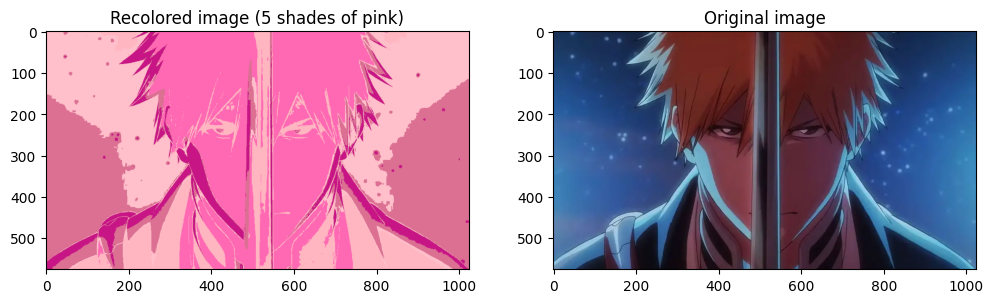

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image using PIL (Python Imaging Library)
image_path = 'C:/Users/ghadf/OneDrive/Desktop/Data Analytics/Python/ML/Kmeans/pics/Bleach.webp'  # Replace 'path_to_your_image.webp' with the actual file path
image = Image.open(image_path)

# Convert the image to a numpy array for further processing
image_np = np.array(image)

# Reshape the 3D image array into a 2D array (rows = pixels, columns = channels)
reshaped_data = image_np.reshape(-1, 3)

# Apply KMeans clustering with 5 clusters to find the dominant colors
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(reshaped_data)

# Get the cluster centers, which represent the dominant colors
dominant_colors = kmeans.cluster_centers_

# Define various shades of pink
pink_colors = [
    [255, 192, 203],  # Pink
    [255, 182, 193],  # Light Pink
    [255, 105, 180],  # Hot Pink
    [219, 112, 147],  # Dark Pink
    [199, 21, 133],   # Medium Violet Red
]

# Replace the dominant colors with various shades of pink
recolored_data = np.copy(reshaped_data)
for i in range(num_clusters):
    recolored_data[kmeans.labels_ == i] = pink_colors[i]

# Reshape the recolored data back to the original image shape
recolored_image = recolored_data.reshape(image_np.shape)

# Convert the recolored data back to PIL Image format for display
recolored_image = Image.fromarray((recolored_image).astype(np.uint8))

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Show the recolored image in the first subplot
ax[0].imshow(recolored_image)
ax[0].set_title(f'Recolored image ({num_clusters} shades of pink)')

# Show the original image in the second subplot
ax[1].imshow(image)
ax[1].set_title('Original image')

# Display the plot
plt.show()
